In [17]:
import numpy as np
import pandas as pd
import scipy.io
import os
import ieeg_funcs as ief
import dgFuncs as dg
from sklearn import preprocessing
import sys
from scipy import stats
import scipy.io as sio
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Reimport functions
import imp
imp.reload(ief)

<module 'ieeg_funcs' from '/home/dgroppe/GIT/DG_LIBRARY/ieeg_funcs.py'>

In [104]:
# Define frequency bands
freq_bands=[(0, 4), (4, 8), (8, 13), (13,30), (30,50), (70, 100)]
band_labels=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'High Gamma']
n_band=len(freq_bands)

In [ ]:
>>> from scipy import signal
>>> randgen = np.random.RandomState(9)
>>> npoints = 1000
>>> noise = randgen.randn(npoints)
>>> x = 3 + 2*np.linspace(0, 1, npoints) + noise
>>> (signal.detrend(x) - noise).max() < 0.01

In [24]:
print(mat_dat['matrix_bi'].shape)
bp_data.shape

(93500, 31)


(31, 93500)

(93500,)

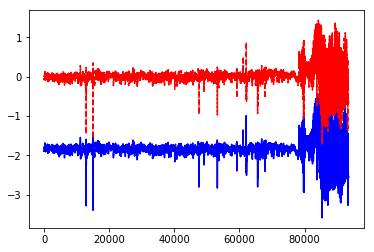

In [30]:
# Load an example data set
in_fname='/home/dgroppe/TWH_EEG/NA/EEG_MAT/NA_d1_sz2.mat'
mat_dat=sio.loadmat(in_fname)
Sf=mat_dat['Sf']
#mat_dat.keys()

# Detrend data
plt.figure(1)
plt.clf()
dat=mat_dat['matrix_bi'][:,0]
plt.plot(dat,'b-')
dat=signal.detrend(dat,0)
plt.plot(dat,'r--')
dat.shape

In [41]:
mat_dat['matrix_bi'].shape
print(dat.shape)

(93500, 31)


Working on (0, 4) Hz
chans 31
tpts 93500
Working on (4, 8) Hz
chans 31
tpts 93500
Working on (8, 13) Hz
chans 31
tpts 93500
Working on (13, 30) Hz
chans 31
tpts 93500
Working on (30, 50) Hz
chans 31
tpts 93500
Working on (70, 100) Hz
chans 31
tpts 93500


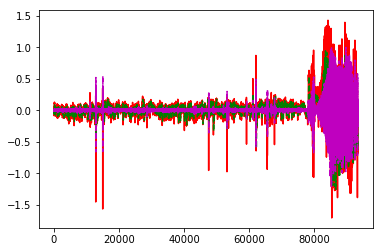

In [60]:
# Load an example data set
in_fname='/home/dgroppe/TWH_EEG/NA/EEG_MAT/NA_d1_sz2.mat'
mat_dat=sio.loadmat(in_fname)
Sf=mat_dat['Sf']
#mat_dat.keys()

# Get SOZ chan
soz_id=0 # ?? get actual chan
n_tpt, n_chan=mat_dat['matrix_bi'].shape

# Detrend data. Some patients have a crazy trend in the first channel
dat=signal.detrend(mat_dat['matrix_bi'],0)
# plt.figure(1)
# plt.clf()
# plt.plot(mat_dat['matrix_bi'][:,0],'b-')
# plt.plot(dat[:,0],'r--')

bp_data=np.zeros((n_band,n_chan,n_tpt))
filt_order=4
# Bandpass filter the data
for band_ct, band in enumerate(freq_bands):
    print('Working on {} Hz'.format(band))
    bp_data[band_ct,:,:]=ief.causal_butter(dat.T,Sf,band,filt_order)
    
# plt.figure(2)
# plt.clf()
# plt.plot(dat[:,0],'r-')
# plt.plot(bp_data[0,0,:],'g--')
# plt.plot(bp_data[3,0,:],'m--')


In [94]:
# Extract magnitude and phase using moving window hilbert transform
n_half_wind=int(np.round(Sf/2))
#wind_ids=int(np.arange(0,n_half_wind*2))
hilby_data=np.zeros((n_band,n_chan,n_tpt),dtype=complex)
#for tpt_ct in range(n_half_wind,n_tpt-n_half_wind):
for tpt_ct in range(n_half_wind,10000):
    hilby=signal.hilbert(bp_data[:,:,(tpt_ct-n_half_wind):(tpt_ct+n_half_wind)])
    hilby_data[:,:,tpt_ct]=hilby[:,:,n_half_wind]

In [96]:
soz_id=0
bp_mag=np.abs(hilby_data[:,soz_id,:])

In [103]:
print(n_band)
print(len(band_labels))
band_labels

6
5


['Delta, Theta', 'Alpha', 'Beta', 'Gamma', 'High Gamma']

0
1
2
3
4
5


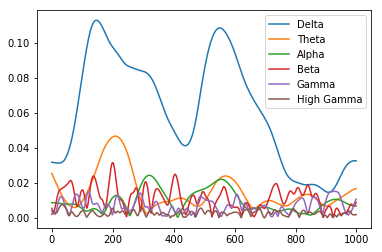

In [105]:
plt.figure()
for band_ct in range(n_band):
    plt.plot(bp_mag[band_ct,1000:2000].T,label=band_labels[band_ct]);
plt.legend()

In [95]:
bp_data.shape
print(n_half_wind*2)
print(hilby.shape)
print(type(hilby))
print(type(hilby_data))
print(hilby_data[0,0,2000:2020])

500
(6, 31, 500)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-0.03153348+0.00808264j -0.03168834+0.0072911j  -0.03181783+0.0064962j
 -0.03192191+0.00569878j -0.03200057+0.0048997j  -0.03205381+0.00409984j
 -0.03208167+0.00330009j -0.03208423+0.00250139j -0.03206164+0.00170471j
 -0.03201413+0.00091098j -0.03194204+0.00012116j -0.03184579-0.00066389j
 -0.03172586-0.00144339j -0.03158275-0.00221661j -0.03141700-0.00298296j
 -0.03122912-0.00374189j -0.03101960-0.00449294j -0.03078891-0.00523572j
 -0.03053743-0.00596986j -0.03026550-0.00669504j]


In [88]:
np.zeros?

In [85]:
hilby=signal.hilbert(bp_data[:,:,(tpt-n_half_wind):(tpt+n_half_wind)])
print(hilby.shape)

(6, 31, 500)


In [ ]:
 scipy.signal.hilbert(x, N=None, axis=-1)[source]

In [47]:
from datetime import datetime

(10,)


In [56]:
# MATLAB style
starttime=datetime.now()
dat=np.random.randn(10000000,10)
bro=np.mean(dat,axis=0)
print(datetime.now()-starttime)

0:00:03.457871


In [57]:
# Python style (slightly faster)
starttime=datetime.now()
dat=np.random.randn(10,10000000)
bro=np.mean(dat,axis=1)
print(datetime.now()-starttime)

0:00:03.320736


In [55]:
print(bro.shape)

(10,)
